In [21]:
# Imports
import pandas as pd
import os
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt

In [4]:
# Define which experiments to analyse
exp_name = 'spot'
experiements_dir = './output'

# NOTE: Change this to decide which experiments to analyse
# get names of folders in a directory that match a pattern
experiment_names = sorted([name for name in os.listdir(experiements_dir) if exp_name in name])


In [5]:
# Define the column name for the label and column name for the prediction
target_column = 'label'
prediction_column = 'preds_aggregate'

In [33]:
df_preds = pd.read_csv(f'{experiements_dir}/spot_EleutherAI_gpt-j-6B_PSyn_K3_AGmv_POrb_DId/predictions.csv', keep_default_na=False)
targets = df_preds[target_column].tolist()
preds = df_preds[prediction_column].tolist()

In [38]:
# Silence UndefinedMetricWarning
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

li_exp_metrics = []
# For each experiment name calculate the metrics: precision, recall, f1, accuracy
for exp_name in experiment_names:

    # Get experiment predictions
    df_preds = pd.read_csv(f'{experiements_dir}/{exp_name}/predictions.csv', keep_default_na=False)

    targets = df_preds[target_column].tolist()
    preds = df_preds[prediction_column].tolist()

    # formatting preds
    preds = [ p.strip('. ') for p in preds ]
    
    # Calculate metrics
    (prec_yes, prec_no), (recall_yes, recall_no), (f1_yes, f1_no), _ = precision_recall_fscore_support(targets, preds, labels=['Yes','No'], average=None)
    prec = (prec_yes + prec_no  ) /2 
    recall = (recall_yes + recall_no ) /2
    f1 = (f1_yes + f1_no ) /2
    acc = accuracy_score(targets, preds)

    # Store metrics
    li_exp_metrics.append( 
        {'exp_name':exp_name, 
            'precision_yes':prec_yes, 'precision':prec, 'precision_no':prec_no,
            'recall_yes':recall_yes, 'recall':recall, 'recall_no':recall_no,
            'f1_yes':f1_yes, 'f1_no':f1_no, 'f1':f1, 
            'accuracy':acc} )

df_metrics = pd.DataFrame.from_records(li_exp_metrics)
df_metrics = df_metrics.set_index('exp_name')
df_metrics = df_metrics.sort_values('accuracy', ascending=False)


In [49]:
df_metrics.sort_values('accuracy', ascending=False )

,precision_yes,precision,precision_no,recall_yes,recall,recall_no,f1_yes,f1_no,f1,accuracy
exp_name,,,,,,,,,,
spot_gpt35turbo_indirectly,0.613806,0.724046,0.834286,0.908840,0.655522,0.402204,0.732739,0.542751,0.637745,0.655172
spot_gpt35turbo_directly,0.666667,0.685792,0.704918,0.701657,0.646972,0.592287,0.683715,0.643713,0.663714,0.646897
spot_gpt35turbo,0.636166,0.711601,0.787037,0.806630,0.637475,0.468320,0.711328,0.587219,0.649273,0.637241
spot_EleutherAI_gpt-j-6B_PSyn_K3_ES3_AGmv_POrb_DIi,0.508170,0.528421,0.548673,0.859116,0.514957,0.170799,0.638604,0.260504,0.449554,0.514483
spot_EleutherAI_gpt-j-6B_PSyn_K3_AGmv_POrb_DId,0.505654,0.521695,0.537736,0.864641,0.510833,0.157025,0.638124,0.243070,0.440597,0.510345
spot_EleutherAI_gpt-j-6B_PSyn_AGmv_POlmp_DId,0.502825,0.574942,0.647059,0.983425,0.506864,0.030303,0.665421,0.057895,0.361658,0.506207
spot_EleutherAI_gpt-j-6B_PSyn_AGmv_POlmp_DIi,0.500692,0.750346,1.000000,1.000000,0.502755,0.005510,0.667281,0.010959,0.339120,0.502069
spot_EleutherAI_gpt-j-6B_PSyn_K3_AGmv_POlmp_DId,0.500808,0.505121,0.509434,0.856354,0.502557,0.148760,0.632008,0.230277,0.431143,0.502069
spot_EleutherAI_gpt-j-6B_PSyn_AGmv_POlmg_DId,1.000000,0.750691,0.501381,0.002762,0.501381,1.000000,0.005510,0.667893,0.336701,0.502069


/tmp/ipykernel_1976401/2009809980.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


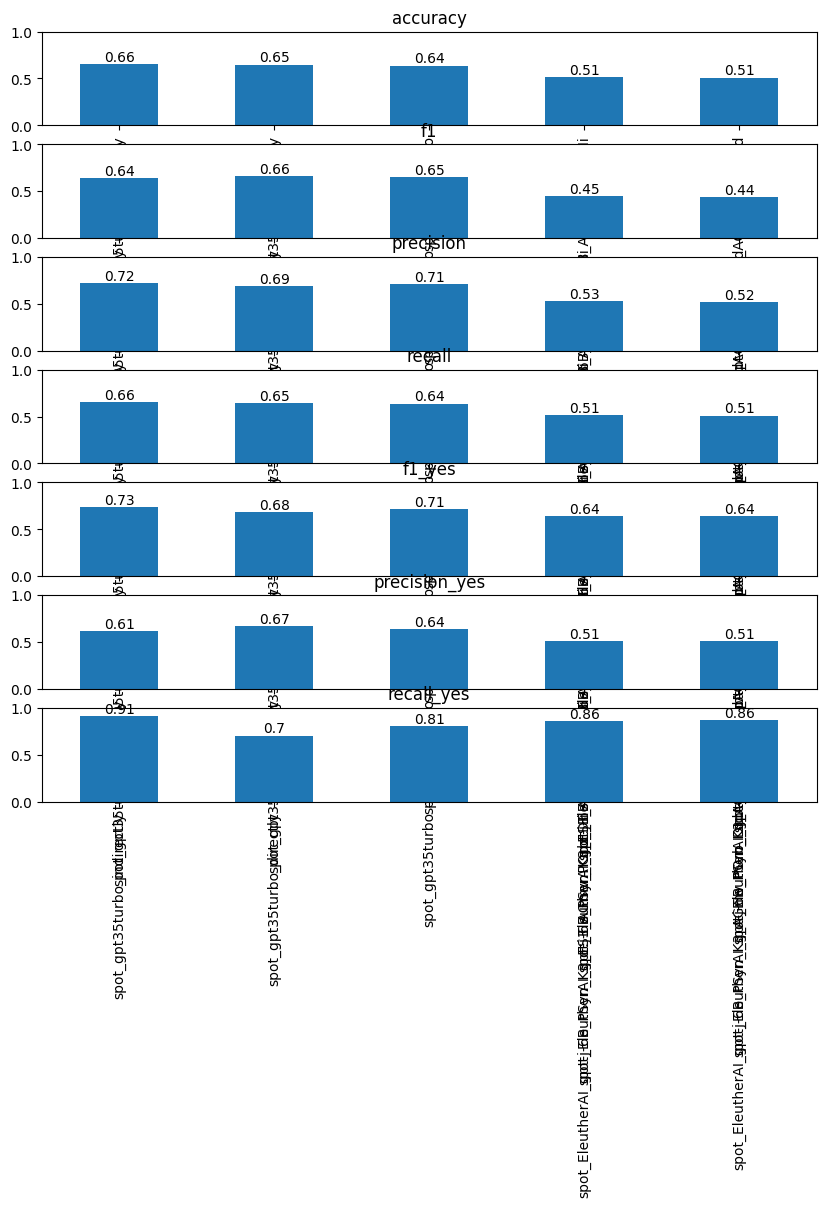

In [47]:
# Saving to file
os.makedirs(os.path.join(experiements_dir, 'summary'), exist_ok=True)
df_metrics.to_csv( os.path.join(experiements_dir, 'summary', f'{exp_name}.csv') )

# Creating Charts Highlightning Performance
# Loop through each metric and plot the corresponding bar chart
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(10, 10))
axs = axs.flatten()
metric_titles = [ 'accuracy','f1', 'precision', 'recall', 'f1_yes', 'precision_yes', 'recall_yes' ]

df_metrics_top = df_metrics.sort_values('accuracy', ascending=False).head( 5 )

for i, metric in enumerate(metric_titles):

    df_metrics_top[metric].plot(kind='bar', ax=axs[i])

    axs[i].set_title(metric)
    axs[i].set_ylim(0, 1)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    
    for j, value in enumerate(df_metrics_top[metric]):
        axs[i].text(j, value, str(round(value, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()